## Quiz #0401

### "Optimal number of clusters for K-means clustering"

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
%matplotlib inline

#### Answer the following question by providing Python code:

In [58]:
# We will use simulated data.
# 3 clusters in 8 dimensional space.
# Hard to visualize!
X, label = make_blobs(n_samples=150, n_features=8, centers=3, cluster_std = 2, random_state=123)
X.shape

(150, 8)

1). Define a function that calculates the "total internal sum of squares".
- X         :   Data.
- centers   :   Array that contains the centroid coordinates. Calculated by kmeans.
- clusters  :   Array of cluster labels. Calculated by kmeans. <br> <br>
HINT: Implement the formula from the lecture note.

In [81]:
data = X
kmeans = KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
centers = kmeans.cluster_centers_
clusters = kmeans.labels_
print("K-means Centroids : ", centers)

K-means Centroids :  [[-0.45058073 -1.95855821 -2.81289371  4.64334117 -1.61152497 -8.70234723
  -2.26657376  4.98800128]
 [-6.09715151 -6.62338226  0.64332419  0.51743229  2.50758482  6.98957767
   4.47094678  1.79021736]
 [ 3.90017709 -4.49107153 -5.42803149  0.79601424  4.29469615 -1.81457648
   9.51919598  3.41269781]]


In [82]:
print("K-mean Labels : ", clusters)

K-mean Labels :  [1 0 2 1 0 1 2 0 1 2 1 2 0 2 2 0 0 2 0 1 0 2 2 2 2 1 1 1 2 1 2 1 0 2 0 2 0
 1 2 0 0 2 1 1 1 2 0 0 2 0 2 2 1 0 2 1 2 2 0 1 0 1 1 1 0 1 1 2 1 0 0 1 0 2
 1 0 0 1 1 1 0 0 0 0 2 1 1 2 1 0 2 0 1 1 0 1 2 0 2 2 1 0 0 1 1 2 1 2 0 2 0
 1 1 2 1 1 2 2 2 2 1 0 2 1 2 2 1 2 0 0 2 0 0 2 1 2 0 0 0 1 2 1 0 0 0 2 1 0
 0 2]


In [86]:
def total_internal_ss(X, centers, clusters):
    
    no_clust = centers.shape[0]  #Get the number of clusters
    
    no_cent = centers.shape[1]   #Get the number of centers
    
    no_rows = X.shape[0]         #Get the number of rows
    
    knneighbors = np.zeros((no_rows, no_cent))
    
    for i in range(no_clust):
        
        indices = (clusters == i)
        
        for j in range(no_cent):
            
            knneighbors[indices,j] = centers[i,j] # The nearest centroid to the our observation
            
    return np.sum((X-knneighbors)**2)

total_internal_ss(X, centers, clusters)

3083.9219806745105

2). Visualize as a Scatter plot the "total internal sum of squares" vs N# of clusters. 
- Then, determine the optimal number of clusters.
- Is this number the same as expected?

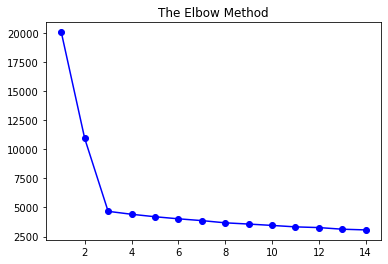

In [91]:
array_cluster = np.array(range(1,15)) # Array that contains the number of clusters

array_total = np.array([]) # Array that contains the total internal sum of squares

for i in array_cluster:
    
    model = KMeans(n_clusters=i)
    
    clusters = model.fit(X).labels_
    
    centers = model.cluster_centers_
    
    array_total = np.append(array_total, total_internal_ss(X,centers,clusters))
    
plt.plot(array_cluster,array_total,color='blue',marker='o')
plt.title('The Elbow Method')
plt.show()

In [ ]:
# The optimal number of clusters is 3 from the elbow plot, and we expected 3 clusters at the beginning so yeah!